In [ ]:
import os
import re
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
structured_path = "/content/drive/MyDrive/EHR_data/data/images/master_metadata.csv"

df_structured = pd.read_csv(structured_path)

print("Before cleaning:", df_structured.shape)
print(df_structured.head())

df_structured.drop_duplicates(inplace=True)

df_structured.dropna(thresh=len(df_structured.columns)//2, inplace=True)

for col in df_structured.select_dtypes(include=['float64', 'int64']).columns:
    df_structured[col] = df_structured[col].fillna(df_structured[col].median())

for col in df_structured.select_dtypes(include=['object']).columns:
    df_structured[col] = df_structured[col].fillna(df_structured[col].mode()[0])

df_structured.columns = df_structured.columns.str.lower().str.replace(' ', '_')

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
num_cols = df_structured.select_dtypes(include=['float64', 'int64']).columns
df_structured[num_cols] = scaler.fit_transform(df_structured[num_cols])


Before cleaning: (300, 6)
    Patient_ID  Age Gender Modality  Num_Slices  \
0  Patient_001   74      F       CT          66   
1  Patient_001   74      F      MRI          84   
2  Patient_002   40      M       CT         110   
3  Patient_002   40      M      MRI          79   
4  Patient_003   80      M       CT          77   

                         Folder_Path  
0   synthetic_slices/Patient_001/CT/  
1  synthetic_slices/Patient_001/MRI/  
2   synthetic_slices/Patient_002/CT/  
3  synthetic_slices/Patient_002/MRI/  
4   synthetic_slices/Patient_003/CT/  


In [ ]:
cleaned_path = "/content/drive/MyDrive/heart_mri_ct/cleaned_structured_ehr.csv"

df_cleaned = pd.read_csv(cleaned_path)

print("After cleaning:", df_cleaned.shape)
print(df_cleaned.head())
print("\nColumns:", list(df_cleaned.columns))

After cleaning: (150, 6)
    patient_id  age gender modality  num_slices  \
0  Patient_001   74      F      MRI          84   
1  Patient_002   40      M      MRI          79   
2  Patient_003   80      M      MRI          77   
3  Patient_004   41      F      MRI          72   
4  Patient_005   46      M      MRI          57   

                         folder_path  
0  synthetic_slices/Patient_001/MRI/  
1  synthetic_slices/Patient_002/MRI/  
2  synthetic_slices/Patient_003/MRI/  
3  synthetic_slices/Patient_004/MRI/  
4  synthetic_slices/Patient_005/MRI/  

Columns: ['patient_id', 'age', 'gender', 'modality', 'num_slices', 'folder_path']


In [ ]:
raw_path = "/content/drive/MyDrive/EHR_data/data/images/master_metadata.csv"

df = pd.read_csv(raw_path)
print("Before filtering:", df.shape)

mri_df = df[df['Modality'].str.contains("MRI", flags=re.IGNORECASE, na=False)]
print("After filtering MRI only:", mri_df.shape)

mri_df.columns = (
    mri_df.columns.str.strip()
    .str.lower()
    .str.replace(r'[^a-z0-9]+', '_', regex=True)
)

mri_df.drop_duplicates(inplace=True)

mri_df.dropna(subset=['patient_id'], inplace=True)

mri_df.reset_index(drop=True, inplace=True)

Before filtering: (300, 6)
After filtering MRI only: (150, 6)


/tmp/ipython-input-595793121.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mri_df.drop_duplicates(inplace=True)
/tmp/ipython-input-595793121.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mri_df.dropna(subset=['patient_id'], inplace=True)


In [ ]:
df_cleaned = pd.read_csv(cleaned_path)
print("Final cleaned MRI structured shape:", df_cleaned.shape)
df_cleaned.head()

Final cleaned MRI structured shape: (150, 6)


patient_id  age gender modality  num_slices  \
0  Patient_001   74      F      MRI          84   
1  Patient_002   40      M      MRI          79   
2  Patient_003   80      M      MRI          77   
3  Patient_004   41      F      MRI          72   
4  Patient_005   46      M      MRI          57   

                         folder_path  
0  synthetic_slices/Patient_001/MRI/  
1  synthetic_slices/Patient_002/MRI/  
2  synthetic_slices/Patient_003/MRI/  
3  synthetic_slices/Patient_004/MRI/  
4  synthetic_slices/Patient_005/MRI/

In [ ]:
cleaned_path = "/content/drive/MyDrive/heart_mri_ct/cleaned_structured_ehr.csv"
df = pd.read_csv(cleaned_path)

df.head()


patient_id  age gender modality  num_slices  \
0  Patient_001   74      F      MRI          84   
1  Patient_002   40      M      MRI          79   
2  Patient_003   80      M      MRI          77   
3  Patient_004   41      F      MRI          72   
4  Patient_005   46      M      MRI          57   

                         folder_path  
0  synthetic_slices/Patient_001/MRI/  
1  synthetic_slices/Patient_002/MRI/  
2  synthetic_slices/Patient_003/MRI/  
3  synthetic_slices/Patient_004/MRI/  
4  synthetic_slices/Patient_005/MRI/

/tmp/ipython-input-1448604221.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='gender', palette='Set2')


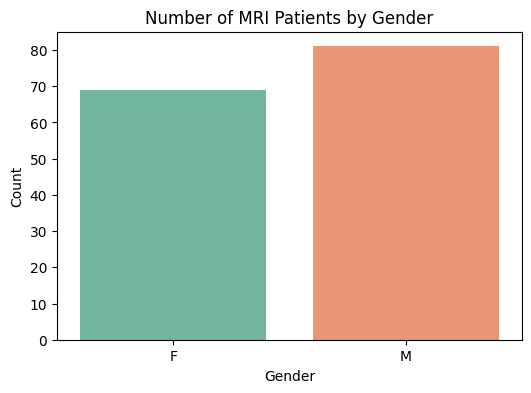

In [ ]:
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='gender', palette='Set2')
plt.title("Number of MRI Patients by Gender")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.show()

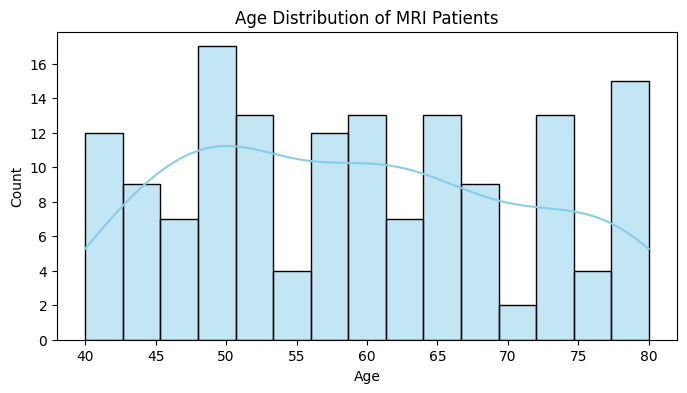

In [ ]:
plt.figure(figsize=(8,4))
sns.histplot(df['age'], bins=15, kde=True, color='skyblue')
plt.title("Age Distribution of MRI Patients")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

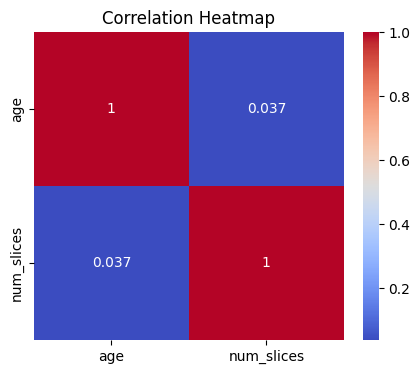

In [ ]:
plt.figure(figsize=(5,4))
sns.heatmap(df[['age','num_slices']].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

Total MRI images found: 15174


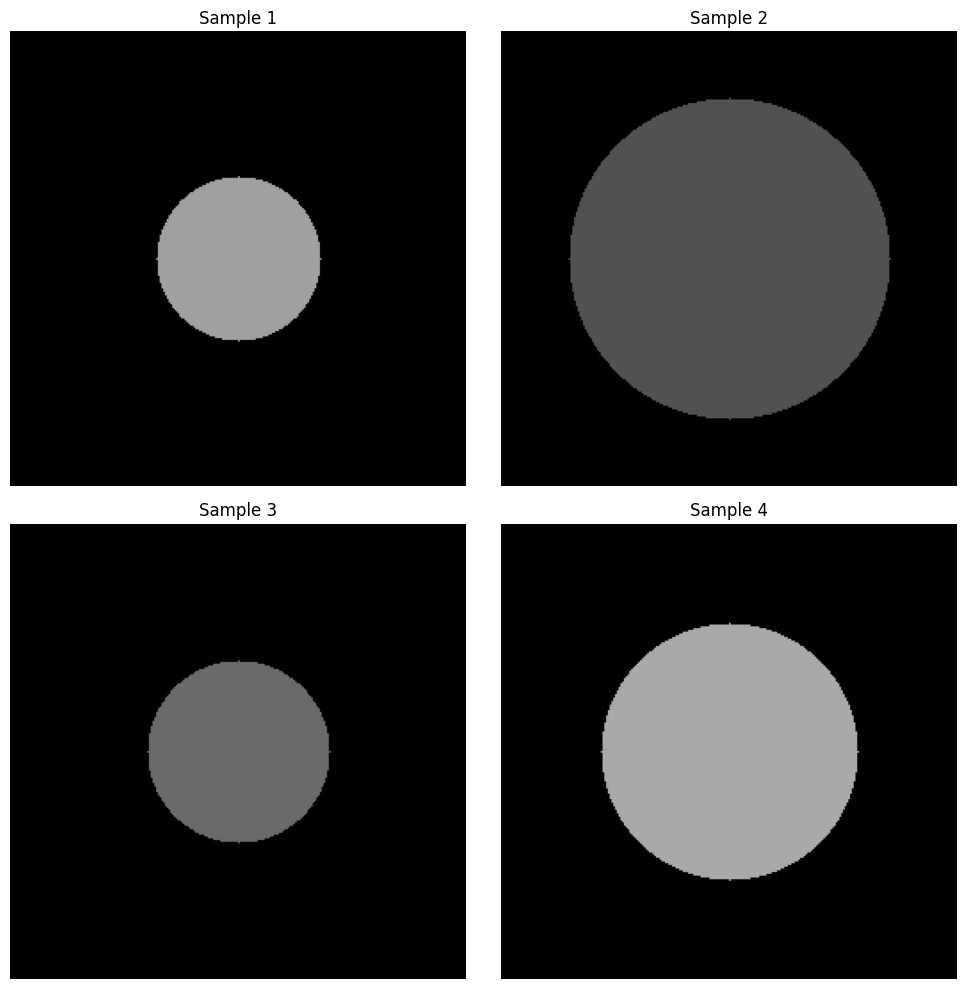

In [ ]:
base_path = "/content/drive/MyDrive/heart_mri_ct/mri_dataset"

image_paths = []
for root, _, files in os.walk(base_path):
    for file in files:
        if file.lower().endswith(('.png')):
            image_paths.append(os.path.join(root, file))

print(f"Total MRI images found: {len(image_paths)}")

plt.figure(figsize=(10, 10))
for i, img_path in enumerate(image_paths[:4]):
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.subplot(2, 2, i+1)
    plt.imshow(img)
    plt.title(f"Sample {i+1}")
    plt.axis("off")

plt.tight_layout()
plt.show()
